# Analysis of Body Measurements using NumPy and Data Visualization (NHANES Dataset)

### Capstone Project – Data Science and Machine Learning

This project analyses body measurement data from the NHANES dataset using NumPy,
Pandas, and Matplotlib. It includes statistical analysis, data visualisation,
BMI calculation, standardisation, correlation analysis, and comparison of body
composition indicators such as waist-to-height and waist-to-hip ratios.


**1. IMPORTING LIBRARIES**




In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

THESE LIBRARIES WILL HELP US TO WORK WITH


*   working with matrices (Numpy)
*   draw graphs (matplotlib)
*   create pairplots (seaborn)
*   organise data (pandas)





**2.LOADING DATASET FROM CSV FILES TO NUMPY MATRICES**

In [17]:


male_df = pd.read_csv(
    "nhanes_adult_male_bmx_2020.csv",
    sep=",",
    comment="#",
    engine="python",
    skip_blank_lines=True,
    encoding="utf-8",
    on_bad_lines="skip"
)

female_df = pd.read_csv(
    "nhanes_adult_female_bmx_2020.csv",
    sep=",",
    comment="#",
    engine="python",
    skip_blank_lines=True,
    encoding="utf-8",
    on_bad_lines="skip"
)




In [18]:
male = male_df.to_numpy()
female = female_df.to_numpy()


In [19]:
print(male.shape)
print(male[:5])


(4081, 7)
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]


The dataset contains comment lines starting with '#'.
Therefore, the comment parameter in pandas.read_csv is used to ignore
all such lines and load only the actual numerical data.

This ensures that the dataset is correctly read as a numeric table.


**3.EXTRACTING WEIGHT DATA**

In [20]:
male_weight=male[:,0]
female_weight=female[:,0]

The slicing operation female[:,0] selects all rows and the first column (weight).
This creates a one-dimensional array of weights for each dataset.
These arrays will be used for visualization and statistical analysis.


**4.HISTOGRAM COMPARISON**

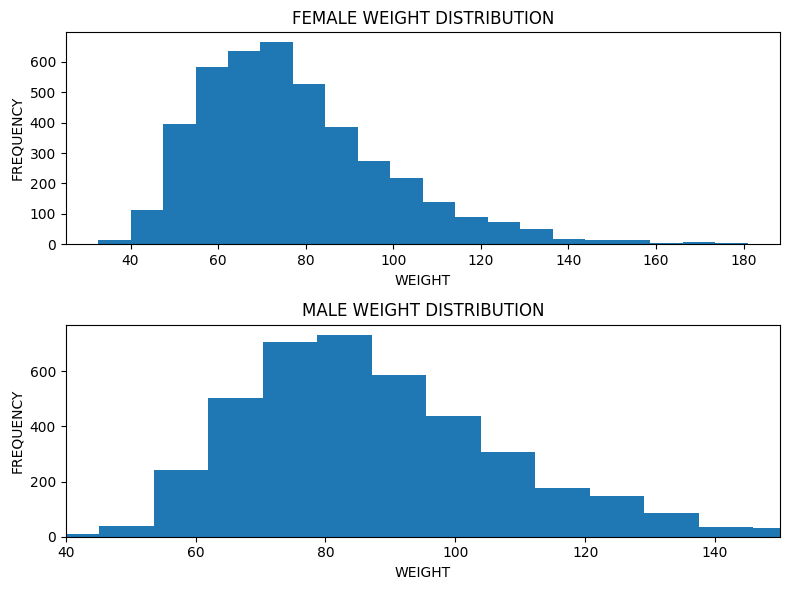

In [26]:
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.hist(female_weight,bins=20)
plt.title("FEMALE WEIGHT DISTRIBUTION")
plt.xlabel("WEIGHT")
plt.ylabel("FREQUENCY")

plt.subplot(2,1,2)
plt.hist(male_weight,bins=20)
plt.title("MALE WEIGHT DISTRIBUTION")
plt.xlabel("WEIGHT")
plt.ylabel("FREQUENCY")

plt.xlim(40,150)



plt.tight_layout()
plt.show()

The boxplot shows that the median weight of males is higher than that of females. The interquartile range for males is larger, which indicates more variation in male weights. Both male and female datasets contain some outliers, but overall the male weight distribution is more spread out.


**5.BOXPLOT COMPARISON OF MALE AND FEMALE WEIGHTS**

/tmp/ipython-input-3732994096.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weight,male_weight],labels=["FEMALE","MALE"])


Text(0, 0.5, 'WEIGHT')

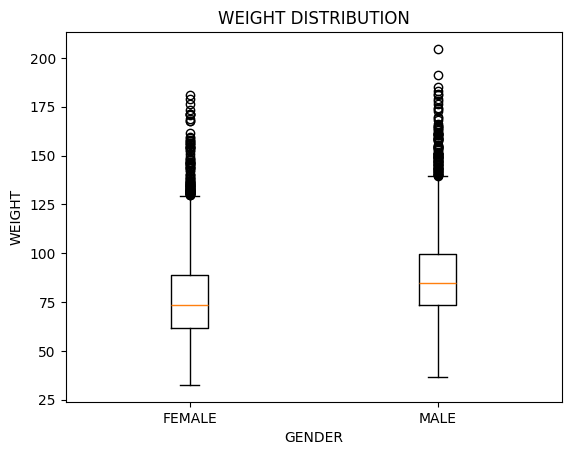

In [27]:
plt.boxplot([female_weight,male_weight],labels=["FEMALE","MALE"])
plt.title("WEIGHT DISTRIBUTION")
plt.xlabel("GENDER")
plt.ylabel("WEIGHT")

The boxplot shows that the median weight of males is higher than that of females.
The interquartile range for males is larger, indicating that male weights have
greater variability. Some outliers are present in both datasets. Overall,
male participants tend to have higher and more spread out body weights compared to females.


**6.STATISTICAL ANALYSIS OF MALE AND FEMALE WEIGHTS**

In [29]:
def stat(x):
  return{
      "mean":np.mean(x),
      "median":np.median(x),
      "std":np.std(x),
      "min":np.min(x),
      "max":np.max(x),
      "skewness": ((x - np.mean(x))**3).mean() / (np.std(x)**3)
  }
male_stats=stat(male_weight)
female_stats=stat(female_weight)
print("Male Statistics:", male_stats)
print("Female Statistics:", female_stats)

Male Statistics: {'mean': np.float64(88.36454300416565), 'median': np.float64(85.0), 'std': np.float64(21.418936717962495), 'min': np.float64(36.8), 'max': np.float64(204.6), 'skewness': np.float64(0.9842810741662346)}
Female Statistics: {'mean': np.float64(77.40379057095475), 'median': np.float64(73.6), 'std': np.float64(21.54250829019315), 'min': np.float64(32.6), 'max': np.float64(180.9), 'skewness': np.float64(1.03336107186799)}


From the computed statistics, it is observed that male participants have
a higher mean and median weight compared to female participants, which
indicates that males are generally heavier on average.

The standard deviation of male weights is larger than that of females,
showing that male weights have greater dispersion and variability.
Female weights are more concentrated around the average.

The skewness values indicate that both distributions are slightly skewed
and not perfectly symmetric. Overall, the male weight distribution is
more spread out and has a higher central value, while the female
distribution is more compact and less variable.


**7.ADDING BMI COLUMN TO FEMALE DATASET**

In [30]:
female_height=female[:,1]/100
female_bmi=female[:,0]/(female_height**2)
female=np.column_stack((female,female_bmi))

The BMI values have been successfully calculated for all female participants
and added as the eighth column in the dataset. This new column provides a
standardised measure of body mass relative to height, which will be useful
for further analysis such as correlation and health risk assessment.


**8.STANDARDISING FEMALE DATASET (Z-SCORE)**

In [31]:
mean_vals=np.mean(female,axis=0)
std_vals=np.std(female,axis=0)
female_z=(female-mean_vals)/std_vals

The new matrix zfemale contains the standardised values of all body
measurements for female participants. Each column now has a mean of
approximately 0 and a standard deviation of 1. This allows us to
compare different variables such as height, weight, waist, and BMI
on the same scale for further analysis.


**9.PAIRPLOT AND CORRELATION ANALYSIS**

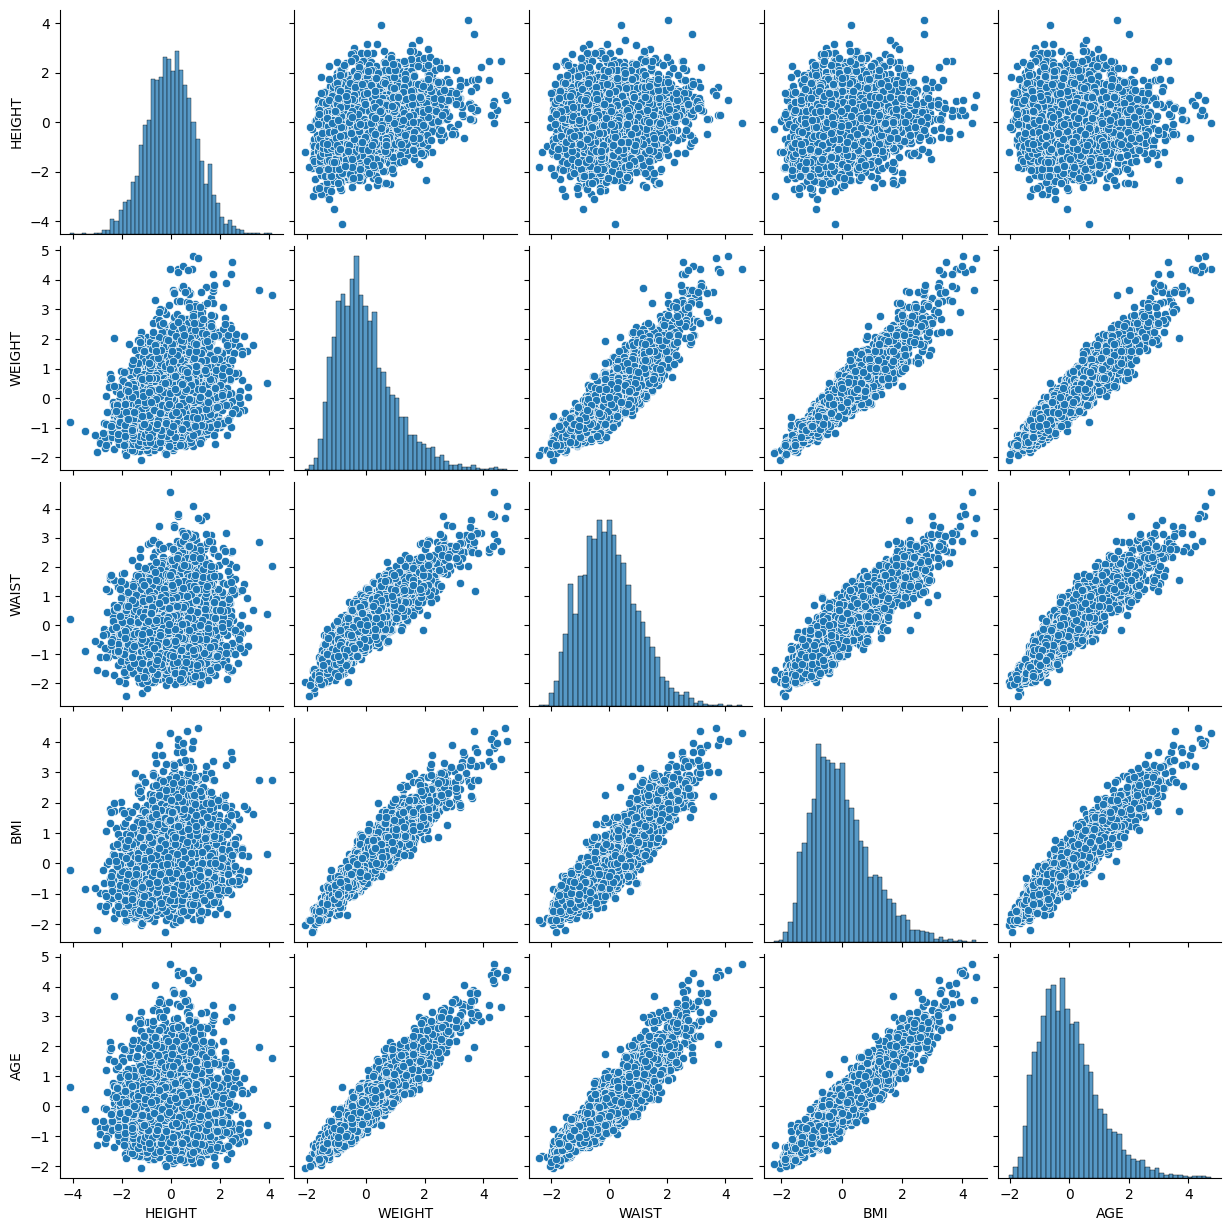

          HEIGHT    WEIGHT     WAIST       BMI       AGE
HEIGHT  1.000000  0.345496  0.126547  0.202895  0.033077
WEIGHT  0.345496  1.000000  0.904550  0.946553  0.945900
WAIST   0.126547  0.904550  1.000000  0.897407  0.921198
BMI     0.202895  0.946553  0.897407  1.000000  0.944199
AGE     0.033077  0.945900  0.921198  0.944199  1.000000
          HEIGHT    WEIGHT     WAIST       BMI       AGE
HEIGHT  1.000000  0.338860  0.108587  0.205405  0.019897
WEIGHT  0.338860  1.000000  0.900169  0.946634  0.937999
WAIST   0.108587  0.900169  1.000000  0.888037  0.923114
BMI     0.205405  0.946634  0.888037  1.000000  0.934196
AGE     0.019897  0.937999  0.923114  0.934196  1.000000


In [33]:
data=female_z[:,[1,0,6,5,7]]
df=pd.DataFrame(data,columns=["HEIGHT","WEIGHT","WAIST","BMI","AGE"])
sns.pairplot(df)
plt.show()

pearson_corr=df.corr()
spearman_corr=df.corr(method="spearman")
print(pearson_corr)
print(spearman_corr)

The scatterplot matrix shows strong positive relationships between weight and BMI,
as well as between waist and hip circumference. This indicates that individuals
with higher body weight tend to have higher BMI and larger waist and hip measurements.

The Pearson correlation coefficients confirm these strong positive relationships,
especially between weight and BMI, and between waist and hip circumference.
Height shows a weaker relationship with BMI compared to weight and waist.

The Spearman correlation values are similar to the Pearson values, which suggests
that the relationships between variables are generally monotonic and consistent.

Overall, body fat related measurements such as waist, hip, and weight are strongly
associated with BMI, while height has a weaker influence.


**10. WAIST-HEIGHT AND WAIST-HIP RATIOS**

In [34]:
male_whtr=male[:,6]/male[:,1]
male_whr=male[:,6]/male[:,5]

male=np.column_stack((male,male_whtr,male_whr))

female_whtr=female[:,6]/female[:,1]
female_whr=female[:,6]/female[:,5]
female=np.column_stack((female,female_whtr,female_whr))

The waist-to-height and waist-to-hip ratios have been successfully calculated
for both male and female participants and added as new columns to their
respective datasets. These ratios provide additional insight into body fat
distribution and are useful indicators of central obesity and potential
health risks.


**11.BOX PLOT COMPARISON OF WAIST RATIOS**

/tmp/ipython-input-2294921188.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


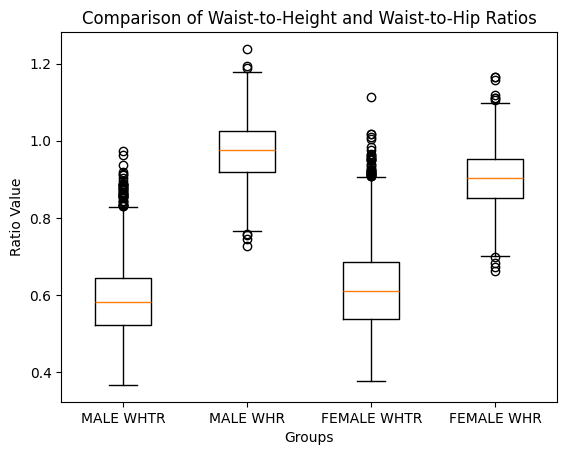

In [35]:
plt.boxplot(
    [male_whtr,male_whr,female_whtr,female_whr],
    labels=["MALE WHTR","MALE WHR","FEMALE WHTR","FEMALE WHR"]
)
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.xlabel("Groups")
plt.ylabel("Ratio Value")

plt.show()

From the boxplot, it can be observed that male participants generally have
slightly higher waist-to-height and waist-to-hip ratios compared to female
participants. This suggests that males tend to have more abdominal fat
distribution.

The spread of the ratios for males is also slightly larger, indicating more
variability in body fat distribution among males. Female ratios appear more
concentrated, showing less variation.

Higher values of these ratios are associated with increased risk of
cardiovascular and metabolic diseases. Therefore, the boxplot suggests
that male participants may have a slightly higher health risk related to
central obesity compared to females.


**12.ADVANTAGES AND DISADVANTAGES OF BMI AND WAIST RATIOS**



### Body Mass Index (BMI)

Advantages:
- BMI is simple and easy to calculate using only height and weight.
- It is widely used and accepted as a general indicator of body weight status.
- It helps to quickly classify individuals as underweight, normal, overweight, or obese.

Disadvantages:
- BMI does not distinguish between fat and muscle mass, so muscular individuals may be misclassified as overweight.
- It does not show where fat is stored in the body.
- It may not accurately reflect health risk for all age groups and body types.

---

### Waist-to-Height Ratio (WHtR)

Advantages:
- WHtR is a good indicator of central (abdominal) fat distribution.
- It is considered a better predictor of health risks such as heart disease and diabetes than BMI.
- It is easy to interpret, as values above about 0.5 indicate increased health risk.

Disadvantages:
- It still uses only one body measurement (waist) relative to height and may not capture overall body composition.
- Measurement errors in waist circumference can affect accuracy.

---

### Waist-to-Hip Ratio (WHR)

Advantages:
- WHR provides information about body fat distribution (apple-shaped vs pear-shaped body).
- It helps identify individuals with higher abdominal fat, which is linked to health risks.
- It is useful in clinical studies related to cardiovascular risk.

Disadvantages:
- It requires two measurements (waist and hip), so it is slightly more complex than BMI.
- It may be less reliable for very tall or very short individuals.
- Changes in both waist and hip together can sometimes hide actual fat gain.

---

### Overall Comparison

BMI is useful for general classification, but waist-based ratios (WHtR and WHR)
provide better insight into fat distribution and health risk. Therefore, waist ratios
are often considered more informative for predicting obesity-related diseases.


**13. ANALYSIS OF LOWEST AND HIGHEST BMI INDIVIDUALS**

In [36]:
idx=np.argsort(female[:,7])
lowest5_idx=idx[:5]
highest5_idx=idx[-5:]
lowest5=female_z[lowest5_idx]
highest5=female_z[highest5_idx]
print("Standardised measurements for 5 lowest BMI individuals:\n", lowest5)
print("\nStandardised measurements for 5 highest BMI individuals:\n", highest5)

Standardised measurements for 5 lowest BMI individuals:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Standardised measurements for 5 highest BMI individuals:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4

The individuals with the lowest BMI have negative z-score values for most
body measurements, especially weight, waist, and hip circumference. This
indicates that these individuals are below the average in terms of body size
and body fat.

On the other hand, the individuals with the highest BMI show large positive
z-score values for weight, waist, and hip measurements. This means they are
well above the average in body mass and fat distribution.

Overall, this comparison shows a clear difference in body composition between
low-BMI and high-BMI individuals. Higher BMI is associated with larger waist
and hip measurements, which indicates greater body fat and potentially higher
health risk.
